In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import API key
from api_keys import weather_api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

<font size="5">Generate Cities List</font>

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

<font size="5">Perform API Calls</font>

In [39]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_units = "imperial"
#Import API key
from api_keys import weather_api_key
#weather_api_key="dfc2727692557b5a27a7378f50f6abae"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={query_units}&q="

#create empty lists for data
lat = []
lon = []
max_temp = []
country = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
time_zone = []
date_and_time = []
found_cities=[]

#perform API calls and create a print log
print("Beginning Data Retrieval")
print("------------------------")
for i, city in enumerate(cities):
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        country.append(response["sys"]["country"])
        time_zone.append(response["timezone"])
        date_and_time.append(response["dt"])
        found_cities.append(city)
        print(f"Processing Record {i+1}: {city} found!...Appending Data")
    except Exception:
        print(f"Processing Record {i+1}: {city} not found...skipping...")
else:
    print("-------------------------")
    print("Data Retrieval Complete")



Beginning Data Retrieval
------------------------
Processing Record 1: praia da vitoria found!...Appending Data
Processing Record 2: severo-kurilsk found!...Appending Data
Processing Record 3: port lincoln found!...Appending Data
Processing Record 4: sondrio found!...Appending Data
Processing Record 5: sinnamary found!...Appending Data
Processing Record 6: miraflores found!...Appending Data
Processing Record 7: sovetskiy found!...Appending Data
Processing Record 8: arraial do cabo found!...Appending Data
Processing Record 9: nong bua found!...Appending Data
Processing Record 10: bandarbeyla found!...Appending Data
Processing Record 11: kango found!...Appending Data
Processing Record 12: puerto ayora found!...Appending Data
Processing Record 13: carnarvon found!...Appending Data
Processing Record 14: nhulunbuy found!...Appending Data
Processing Record 15: rikitea found!...Appending Data
Processing Record 16: mataura found!...Appending Data
Processing Record 17: hilo found!...Appending D

Processing Record 149: develi found!...Appending Data
Processing Record 150: blagoyevo found!...Appending Data
Processing Record 151: aswan found!...Appending Data
Processing Record 152: makaha found!...Appending Data
Processing Record 153: burica not found...skipping...
Processing Record 154: ushtobe found!...Appending Data
Processing Record 155: gorontalo found!...Appending Data
Processing Record 156: coahuayana found!...Appending Data
Processing Record 157: grindavik found!...Appending Data
Processing Record 158: bengkulu found!...Appending Data
Processing Record 159: constantine found!...Appending Data
Processing Record 160: ribeira grande found!...Appending Data
Processing Record 161: vultureni found!...Appending Data
Processing Record 162: bredasdorp found!...Appending Data
Processing Record 163: karla found!...Appending Data
Processing Record 164: valley city found!...Appending Data
Processing Record 165: cherskiy found!...Appending Data
Processing Record 166: tautira found!...A

Processing Record 295: fortuna foothills found!...Appending Data
Processing Record 296: maragua found!...Appending Data
Processing Record 297: morant bay found!...Appending Data
Processing Record 298: barawe not found...skipping...
Processing Record 299: zhangye found!...Appending Data
Processing Record 300: half moon bay found!...Appending Data
Processing Record 301: karakol found!...Appending Data
Processing Record 302: tiznit found!...Appending Data
Processing Record 303: chara found!...Appending Data
Processing Record 304: muros found!...Appending Data
Processing Record 305: san patricio found!...Appending Data
Processing Record 306: rong kwang found!...Appending Data
Processing Record 307: mezen found!...Appending Data
Processing Record 308: merauke found!...Appending Data
Processing Record 309: puerto madryn found!...Appending Data
Processing Record 310: grand baie found!...Appending Data
Processing Record 311: leningradskiy found!...Appending Data
Processing Record 312: beterou 

Processing Record 441: los llanos de aridane found!...Appending Data
Processing Record 442: phalaborwa found!...Appending Data
Processing Record 443: viamao found!...Appending Data
Processing Record 444: qui nhon found!...Appending Data
Processing Record 445: bayan found!...Appending Data
Processing Record 446: monroe found!...Appending Data
Processing Record 447: saint pete beach found!...Appending Data
Processing Record 448: newport found!...Appending Data
Processing Record 449: urdoma found!...Appending Data
Processing Record 450: ginir found!...Appending Data
Processing Record 451: buraydah found!...Appending Data
Processing Record 452: rosario found!...Appending Data
Processing Record 453: rzhev found!...Appending Data
Processing Record 454: quixada found!...Appending Data
Processing Record 455: kalispell found!...Appending Data
Processing Record 456: sabya found!...Appending Data
Processing Record 457: harper found!...Appending Data
Processing Record 458: celakovice found!...Appe

Processing Record 588: ostrovnoy found!...Appending Data
Processing Record 589: goure found!...Appending Data
Processing Record 590: talnakh found!...Appending Data
Processing Record 591: taoudenni found!...Appending Data
Processing Record 592: sabang found!...Appending Data
Processing Record 593: hongjiang found!...Appending Data
Processing Record 594: opuwo found!...Appending Data
Processing Record 595: puerto escondido found!...Appending Data
Processing Record 596: shaoyang found!...Appending Data
Processing Record 597: ayorou found!...Appending Data
Processing Record 598: along found!...Appending Data
Processing Record 599: santa isabel do rio negro found!...Appending Data
Processing Record 600: igarka found!...Appending Data
Processing Record 601: urbana found!...Appending Data
Processing Record 602: taltal found!...Appending Data
Processing Record 603: kushiro found!...Appending Data
Processing Record 604: izhma found!...Appending Data
Processing Record 605: kant found!...Appendi

<font size="5">Convert Raw Data to DataFrame</font>

In [43]:
# create a data frame from the collected data
weather_dict = {
    "City": found_cities,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temp,
    "Maximum Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Maximum Speed": max_temp,
    "Country": country,
    "Time Zone": time_zone,
    "Date and Time": date_and_time,
}

weather_data_with_humidity = pd.DataFrame(weather_dict)

#export the city data to a csv file
import os
weather_data_with_humidity.to_csv(os.path.join("output_data","cities.csv"))

#display the df
weather_data_with_humidity

,City,Latitude,Longitude,Temperature,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Maximum Speed,Country,Time Zone,Date and Time
0,praia da vitoria,38.7333,-27.0667,63.81,64.40,82,75,21.30,64.40,PT,-3600,1612040003
1,severo-kurilsk,50.6789,156.1250,23.45,23.45,95,100,31.07,23.45,RU,39600,1612040003
2,port lincoln,-34.7333,135.8667,60.31,60.31,80,0,13.38,60.31,AU,37800,1612040003
3,sondrio,46.1690,9.8692,42.37,46.00,79,100,4.18,46.00,IT,3600,1612040003
4,sinnamary,5.3833,-52.9500,79.09,79.09,86,100,14.20,79.09,GF,-10800,1612040003
...,...,...,...,...,...,...,...,...,...,...,...,...
546,urbana,40.1106,-88.2073,32.76,33.80,86,90,20.71,33.80,US,-21600,1612040095
547,taltal,-25.4000,-70.4833,71.38,71.38,58,22,5.37,71.38,CL,-10800,1612040095
548,kushiro,42.9750,144.3747,17.85,17.85,92,0,9.89,17.85,JP,32400,1612040095
549,izhma,65.0083,53.9113,-0.40,-0.40,91,100,9.60,-0.40,RU,10800,1612040095


<font size="5">Inspect the data and remove the cities where the humidity > 100%.</font>

In [44]:
#remove cities where humidity is greater than 100%
weather_data_without_humidity=weather_data_with_humidity[weather_data_with_humidity["Humidity"]<=100]
#get the indices of cities that have humidity over 100%.
too_humid_df=weather_data_with_humidity[weather_data_with_humidity["Humidity"]>100]
too_humid_df

,City,Latitude,Longitude,Temperature,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Maximum Speed,Country,Time Zone,Date and Time


In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
z_scores = stats.zscore(weather_data_without_humidity[["Humidity"]])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores > 3).all(axis=1)
humidity_outlier_df = weather_data_without_humidity[filtered_entries]
#display outliers
humidity_outlier_df

,City,Latitude,Longitude,Temperature,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Maximum Speed,Country,Time Zone,Date and Time
373,calama,-22.4667,-68.9333,75.2,75.2,10,0,23.02,75.2,CL,-10800,1612040068


In [46]:
import os
z_scores = stats.zscore(weather_data_without_humidity[["Humidity"]])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
weather_data = weather_data_without_humidity[filtered_entries]
weather_data.to_csv(os.path.join("output_data","clean_cities.csv"))
#display clean data frame
weather_data

,City,Latitude,Longitude,Temperature,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Maximum Speed,Country,Time Zone,Date and Time
0,praia da vitoria,38.7333,-27.0667,63.81,64.40,82,75,21.30,64.40,PT,-3600,1612040003
1,severo-kurilsk,50.6789,156.1250,23.45,23.45,95,100,31.07,23.45,RU,39600,1612040003
2,port lincoln,-34.7333,135.8667,60.31,60.31,80,0,13.38,60.31,AU,37800,1612040003
3,sondrio,46.1690,9.8692,42.37,46.00,79,100,4.18,46.00,IT,3600,1612040003
4,sinnamary,5.3833,-52.9500,79.09,79.09,86,100,14.20,79.09,GF,-10800,1612040003
...,...,...,...,...,...,...,...,...,...,...,...,...
546,urbana,40.1106,-88.2073,32.76,33.80,86,90,20.71,33.80,US,-21600,1612040095
547,taltal,-25.4000,-70.4833,71.38,71.38,58,22,5.37,71.38,CL,-10800,1612040095
548,kushiro,42.9750,144.3747,17.85,17.85,92,0,9.89,17.85,JP,32400,1612040095
549,izhma,65.0083,53.9113,-0.40,-0.40,91,100,9.60,-0.40,RU,10800,1612040095


<font size="5">Plotting the Data</font>


<font size="5">Latitude vs. Temperature Plot</font>

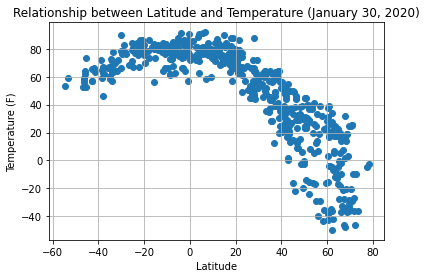

In [47]:
plt.scatter(weather_data["Latitude"], weather_data["Maximum Temperature"], marker="o")
plt.title("Relationship between Latitude and Temperature (January 30, 2020)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure as a .png file
plt.savefig(os.path.join("output_data","TemperaturesInWorldCities.png"))

# Show plot
plt.show()

There appears to be a relationship between a city's distance from the equator and its temperature on the date in question.

<font size="5">Latitude vs. Humidity</font>


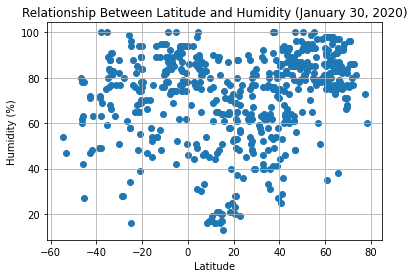

In [48]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")
plt.title("Relationship Between Latitude and Humidity (January 30, 2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(os.path.join("output_data","HumidityInWorldCities.png"))

# Show plot
plt.show()

There does not appear to be a relationship between a city's distance from the equator and its humidity on the date in question.

<font size="5">Latitute vs. "Cloudiness"</font>


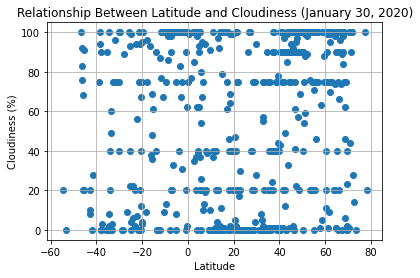

In [49]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")
plt.title("Relationship Between Latitude and Cloudiness (January 30, 2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(os.path.join("output_data","CloudinessInWorldCities.png"))

# Show plot
plt.show()

There does not appear to be a relationship between a city's distance from the equator and its "cloudiness" on the date in question.

<font size="5">Latitude vs. Windspeed</font>


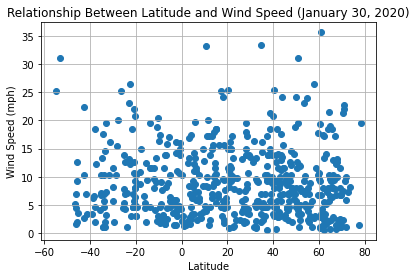

In [50]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")
plt.title("Relationship Between Latitude and Wind Speed (January 30, 2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(os.path.join("output_data","WindSpeedInWorldCities.png"))

# Show plot
plt.show()

There does not appear to be a relationship between a city's distance from the equator and the wind speed in the city on the date in question.

<font size="5">Linear Regression of the Datasets for Each Hemisphere</font>

<font size="5">Max Temp vs. Latitude Linear Regression</font>

In [51]:
#create a dataframe for each hemisphere
northern_hemi_df=weather_data[weather_data["Latitude"]>=0]
southern_hemi_df=weather_data[weather_data["Latitude"]<=0]

The correlation coefficient for the Northern Hemisphere is: -0.8662782935449037
The correlation coefficient for the Southern Hemisphere is: 0.5879373371861818


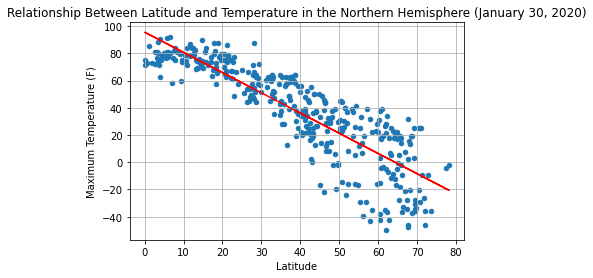

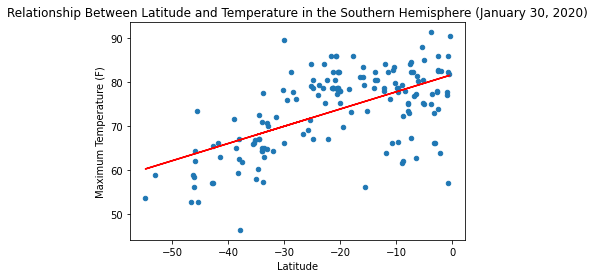

In [52]:
northern_hemi_df.plot(kind="scatter",x="Latitude",y="Maximum Temperature")
x=northern_hemi_df['Latitude']
y=northern_hemi_df["Maximum Temperature"]
(slope, intercept, r, p, stderr)=stats.linregress(x, y)
y_predict=slope*x+intercept
plt.plot(x,y_predict,color="r")
plt.show
plt.title("Relationship Between Latitude and Temperature in the Northern Hemisphere (January 30, 2020)")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The correlation coefficient for the Northern Hemisphere is: {r}")
plt.savefig(os.path.join("output_data","NorthernHemisphereTempvLatitude.png"))

southern_hemi_df.plot(kind="scatter",x="Latitude",y="Maximum Temperature")
x=southern_hemi_df['Latitude']
y=southern_hemi_df["Maximum Temperature"]
(slope, intercept, r, p, stderr)=stats.linregress(x, y)
y_predict=slope*x+intercept
plt.plot(x,y_predict,color="r")
plt.title("Relationship Between Latitude and Temperature in the Southern Hemisphere (January 30, 2020)")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.show
print(f"The correlation coefficient for the Southern Hemisphere is: {r}")
plt.savefig(os.path.join("output_data","SouthernHemisphereTempvLatitude.png"))

There appears to be a strong negative linear relationship between a city's latitude and its temperature in the Northern Hemisphere. There appears to be a moderate positive linear relationship between a city's latitude and temperature in the Southern Hemisphere. It also appears there are more data points in the Northern Hemisphere.

<font size="5">Humidity vs. Latitude Linear Regression</font>

The correlation coefficient for the Southern Hemisphere is: 0.2784553272921192
The correlation coefficient for the Northern Hemisphere is: 0.4120215516379412


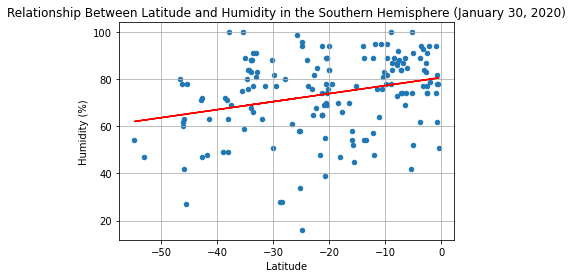

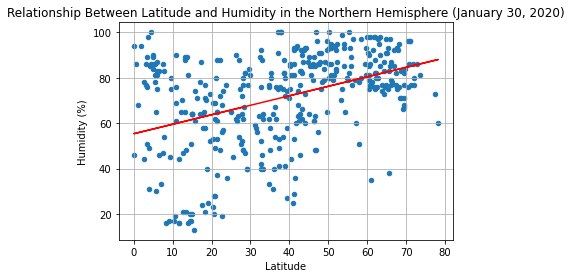

In [53]:
southern_hemi_df.plot(kind="scatter",x="Latitude",y="Humidity")
x=southern_hemi_df['Latitude']
y=southern_hemi_df["Humidity"]
(slope, intercept, r, p, stderr)=stats.linregress(x, y)
y_predict=slope*x+intercept
plt.plot(x,y_predict,color="r")
plt.title("Relationship Between Latitude and Humidity in the Southern Hemisphere (January 30, 2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show
print(f"The correlation coefficient for the Southern Hemisphere is: {r}")
plt.savefig(os.path.join("output_data","SouthernHemisphereHumidityvLatitude.png"))

northern_hemi_df.plot(kind="scatter",x="Latitude",y="Humidity")
x=northern_hemi_df['Latitude']
y=northern_hemi_df["Humidity"]
(slope, intercept, r, p, stderr)=stats.linregress(x, y)
y_predict=slope*x+intercept
plt.plot(x,y_predict,color="r")
plt.title("Relationship Between Latitude and Humidity in the Northern Hemisphere (January 30, 2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show
print(f"The correlation coefficient for the Northern Hemisphere is: {r}")
plt.savefig(os.path.join("output_data","NorthernHemisphereHumidityvLatitude.png"))

There appears to be a very weak positive linear relationship between a city's latitude and its humidity in the Southern Hemisphere. There appears to be a weak positive linear relationship between a city's latitude and humidity in the Northern Hemisphere. It also appears there are more data points in the Northern Hemisphere.

<font size="5">Cloudiness vs. Latitude Linear Regression</font>

The correlation coefficient for the Southern Hemisphere is: 0.32924800425136874
The correlation coefficient for the Northern Hemisphere is: 0.26716849486697


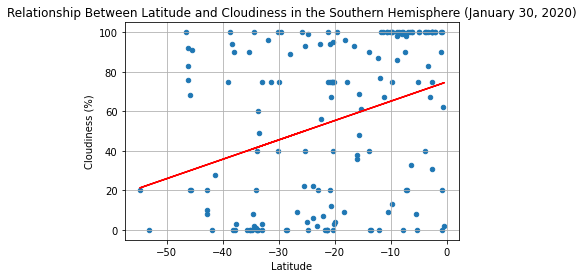

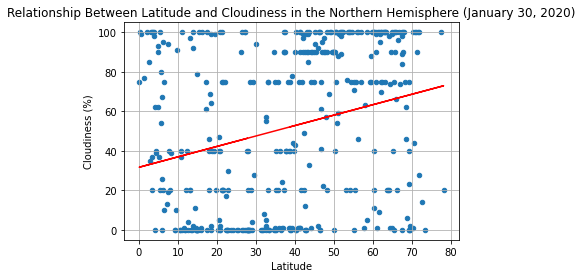

In [54]:
southern_hemi_df.plot(kind="scatter",x="Latitude",y="Cloudiness")
x=southern_hemi_df['Latitude']
y=southern_hemi_df["Cloudiness"]
(slope, intercept, r, p, stderr)=stats.linregress(x, y)
y_predict=slope*x+intercept
plt.plot(x,y_predict,color="r")
plt.title("Relationship Between Latitude and Cloudiness in the Southern Hemisphere (January 30, 2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show
print(f"The correlation coefficient for the Southern Hemisphere is: {r}")
plt.savefig(os.path.join("output_data","SouthernHemisphereCloudinessvLatitude.png"))

northern_hemi_df.plot(kind="scatter",x="Latitude",y="Cloudiness")
x=northern_hemi_df['Latitude']
y=northern_hemi_df["Cloudiness"]
(slope, intercept, r, p, stderr)=stats.linregress(x, y)
y_predict=slope*x+intercept
plt.plot(x,y_predict,color="r")
plt.title("Relationship Between Latitude and Cloudiness in the Northern Hemisphere (January 30, 2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show
print(f"The correlation coefficient for the Northern Hemisphere is: {r}")
plt.savefig(os.path.join("output_data","NorthernHemisphereCloudinessvLatitude.png"))

There appears to be a weak positive linear relationship between a city's latitude and its cloudiness in the Southern Hemisphere. There appears to be a weak positive linear relationship between a city's latitude and humidity in the Northern Hemisphere. It also appears there are more data points in the Northern Hemisphere.

<font size="5">Wind Speed vs. Latitude Linear Regression</font>

The correlation coefficient for the Southern Hemisphere is: -0.09929553518017763
The correlation coefficient for the Northern Hemisphere is: -0.04202381884877197


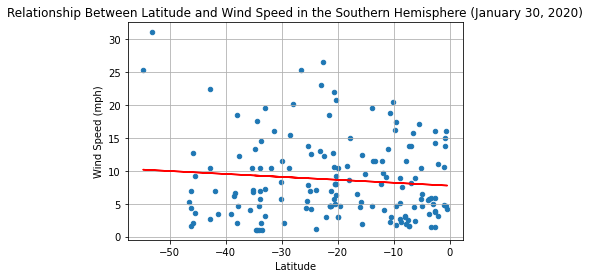

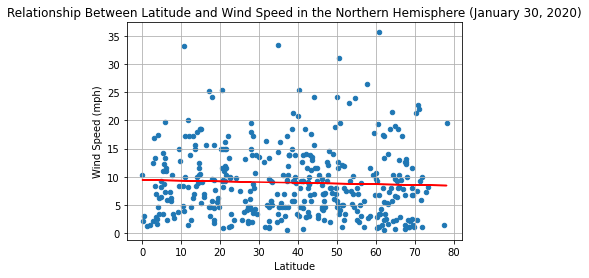

In [55]:
southern_hemi_df.plot(kind="scatter",x="Latitude",y="Wind Speed")
x=southern_hemi_df['Latitude']
y=southern_hemi_df["Wind Speed"]
(slope, intercept, r, p, stderr)=stats.linregress(x, y)
y_predict=slope*x+intercept
plt.plot(x,y_predict,color="r")
plt.title("Relationship Between Latitude and Wind Speed in the Southern Hemisphere (January 30, 2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show
print(f"The correlation coefficient for the Southern Hemisphere is: {r}")
plt.savefig(os.path.join("output_data","SouthernHemisphereWindSpeedvLatitude.png"))

northern_hemi_df.plot(kind="scatter",x="Latitude",y="Wind Speed")
x=northern_hemi_df['Latitude']
y=northern_hemi_df["Wind Speed"]
(slope, intercept, r, p, stderr)=stats.linregress(x, y)
y_predict=slope*x+intercept
plt.plot(x,y_predict,color="r")
plt.title("Relationship Between Latitude and Wind Speed in the Northern Hemisphere (January 30, 2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show
print(f"The correlation coefficient for the Northern Hemisphere is: {r}")
plt.savefig(os.path.join("output_data","NorthernHemisphereWindSpeedvLatitude.png"))

There appears to be almost no linear relationship between a city's latitude and its wind speed in the Southern Hemisphere. There appears to be almost no linear relationship between a city's latitude and wind speed in the Northern Hemisphere. It also appears there are more data points in the Northern Hemisphere.

Analysis:

Trends Based on Data

1. Based on the data, there was a strong correlation in the Northern Hemisphere between a city's latitude and its max temperature on January 30, 2021, i.e. the further a city is from the equator, the lower the max temperature was in the city on January 30, 2021.

2. Based on the data, the correlation between a city's latitude and temperature is not as strong in the Southern Hemisphere as it is in the Northern Hemisphere.

3. Based on the data, generating a random list of cities results in more cities in the Northern Hemisphere than the Southern Hemisphere. Based on that observation it is reasonable to presume there is more habitable land in the Northern Hemisphere than in the Southern Hemisphere.